In [6]:
#1 Imputasi missing value
import pandas as pd
from sklearn.impute import SimpleImputer

data = pd.read_csv("diabetes.csv")

imputer_mean = SimpleImputer(strategy='mean')
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = imputer_mean.fit_transform(data[numeric_cols])

print("\nMissing Values Imputation:")
print(data.isnull().sum())


Missing Values Imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


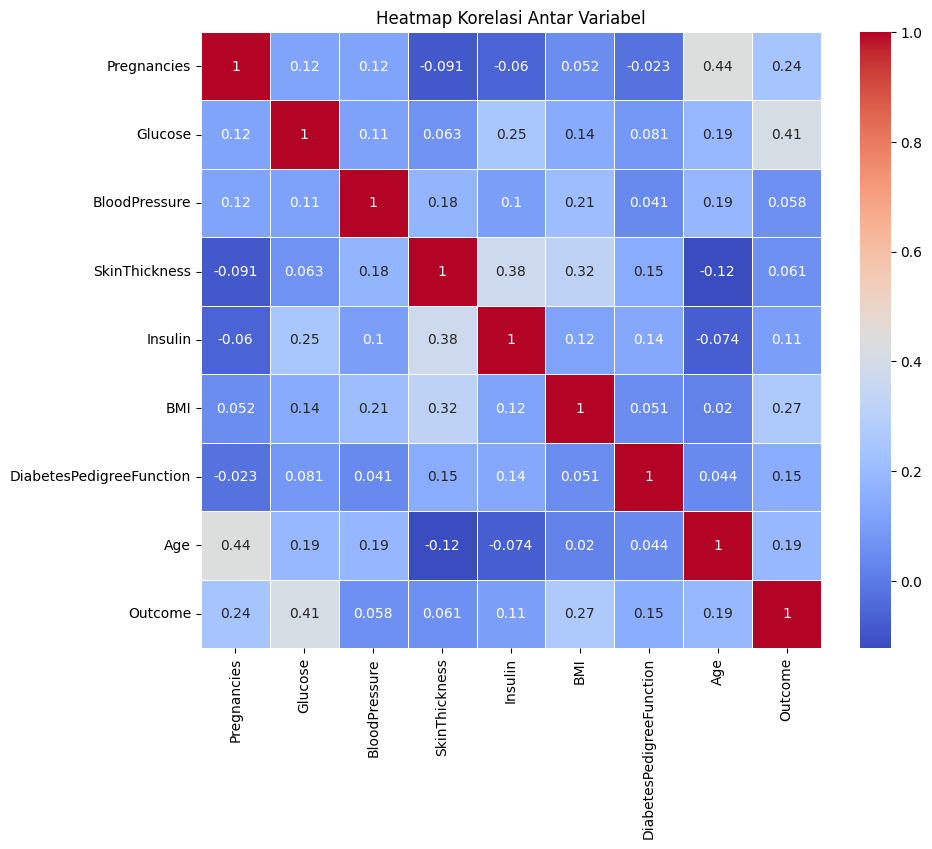

In [7]:
#2. cek korelasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()


In [2]:

# Misalkan kolom terakhir adalah target (label)
X = data.iloc[:, :-1]  # Fitur
y = data.iloc[:, -1]   # Target

# Menampilkan jumlah kelas sebelum undersampling
print("Jumlah kelas sebelum undersampling:", Counter(y))

# Memisahkan kelas mayoritas dan minoritas
class_0 = data[data.iloc[:, -1] == 0]
class_1 = data[data.iloc[:, -1] == 1]

# Melakukan undersampling pada kelas mayoritas
class_0_sampled = class_0.sample(len(class_1), random_state=42)

# Menggabungkan kembali kelas
undersampled_data = pd.concat([class_0_sampled, class_1])

# Mengocok ulang dataset
undersampled_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Menampilkan jumlah kelas setelah undersampling
print("Jumlah kelas setelah undersampling:", Counter(undersampled_data.iloc[:, -1]))

# Memisahkan kembali fitur dan target
X_undersampled = undersampled_data.iloc[:, :-1]
y_undersampled = undersampled_data.iloc[:, -1]


Jumlah kelas sebelum undersampling: Counter({0: 500, 1: 268})
Jumlah kelas setelah undersampling: Counter({0: 268, 1: 268})


In [4]:
# 4. Scaling with Robust Scaler and MinMax Scaler

robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

X_robust_scaled = robust_scaler.fit_transform(X_resampled)
X_minmax_scaled = minmax_scaler.fit_transform(X_resampled)

print("\nSample Data After Scaling with RobustScaler:")
print(X_robust_scaled[:5])

print("\nSample Data After Scaling with MinMaxScaler:")
print(X_minmax_scaled[:5])

print("\nProses preprocessing selesai.")



Sample Data After Scaling with RobustScaler:
[[-0.70079595 -0.04301414 -2.07994028  0.72727273 -0.14018659  0.
  -0.41704918 -0.62816337]
 [ 1.54920405 -0.83713179 -0.57994028 -0.6969697  -0.77655022 -1.45087626
  -0.71344262 -0.16662491]
 [-0.70079595 -0.63124944 -0.91327362 -0.39393939 -0.77655022 -1.56992388
   0.29377049 -0.93585568]
 [ 0.29920405  0.22169174  0.92005972 -0.6969697  -0.77655022  0.62055231
  -0.77377049  0.        ]
 [-0.20079595 -1.36654355 -0.07994028  0.15151515  0.         -0.54611436
  -0.38295082 -0.78200952]]

Sample Data After Scaling with MinMaxScaler:
[[0.05882353 0.59798995 0.38596491 0.47474747 0.09264706 0.47680597
  0.09810588 0.07843137]
 [0.58823529 0.46231156 0.54385965 0.         0.         0.38599106
  0.04322487 0.19607843]
 [0.05882353 0.49748744 0.50877193 0.1010101  0.         0.37853949
  0.22972317 0.        ]
 [0.29411765 0.64321608 0.70175439 0.         0.         0.51564829
  0.0320544  0.23855145]
 [0.17647059 0.3718593  0.59649123 0.2